In [15]:
import torch
import torch.nn as nn

In [22]:
# Sample data
data = ["the cat sat on the mat", "the dog lay on the rug", "I love you very much", 
        "This day is very beautiful and swimming will be great."]

# Building vocabulary
vocab = set(' '.join(data).split())
vocab_size = len(vocab)
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for word, i in word_to_ix.items()}

# Preparing input and target data
pairs = [sentence.split() for sentence in data]
input_data = [[word_to_ix[word] for word in sentence[:-1]] for sentence in pairs]
target_data = [word_to_ix[sentence[-1]] for sentence in pairs]  # Flattened

inputs = [torch.tensor(seq, dtype=torch.long) for seq in input_data]
targets = torch.tensor(target_data, dtype=torch.long)  # 1D tensor

# Dimensions
embedding_dim = 10
hidden_dim = 20

# Creating a RNN model with attention

At PyBooks, the team has been exploring various deep learning architectures. After some research, you decide to implement an RNN with Attention mechanism to predict the next word in a sentence. You're given a dataset with sentences and a vocabulary created from them.

* vocab and vocab_size: The vocabulary set and its size
* word_to_ix and ix_to_word: dictionary for word to index and index to word mappings
* input_data and target_data: converted dataset to input-output pairs
* embedding_dim and hidden_dim: dimensions for embedding and RNN hidden state

You can inspect the data variable in the console to see the example sentences.


* Create an embedding layer for the vocabulary with the given embedding_dim.
* Apply a linear transformation to the RNN sequence output to get the attention scores.
* Get the attention weights from the score.
* Compute the context vector as the weighted sum of RNN outputs and attention weights




In [23]:
class RNNWithAttentionModel(nn.Module):
    def __init__(self):
        super(RNNWithAttentionModel, self).__init__()
        # Create an embedding layer for the vocabulary
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.RNN(embedding_dim, hidden_dim, batch_first=True)
        # Apply a linear transfopad_sequencesrmation to get the attention scores
        self.attention = nn.Linear(hidden_dim, 1)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        
    def forward(self, x):
        x = self.embeddings(x)
        out, _ = self.rnn(x)
        #  Get the attention weights
        attn_weights = torch.nn.functional.softmax(self.attention(out).squeeze(2), dim=1)
        # Compute the context vector 
        context = torch.sum(attn_weights.unsqueeze(2) * out, dim=1)
        out = self.fc(context)
        return out
    
def pad_sequences(batch):
    max_len = max([len(seq) for seq in batch])
    return torch.stack([torch.cat([seq,torch.zeros(max_len - len(seq)).long()]) for seq in batch])

attention_model = RNNWithAttentionModel()
optimizer = torch.optim.Adam(attention_model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()
print("Model Instantiated")

Model Instantiated


You've incorporated the attention mechanism into the RNN, which helps the model to focus on relevant parts of the input when making a prediction

# Training and testing the RNN model with attention

At PyBooks, the team had previously built an RNN model for word prediction without the attention mechanism. This initial model, referred to as rnn_model, has already been trained and its instance is preloaded. Your task now is to train the new RNNWithAttentionModel and compare its predictions with that of the earlier rnn_model.

The following has been preloaded

* inputs: list of input sequences as tensors
* targets: tensor containing target words for each input sequence
* optimizer: Adam optimizer function
* criterion: CrossEntropyLoss function
* pad_sequences: function to pad input sequences for batching
* attention_model: defined model class from the previous exercise
* rnn_model:trained RNN model from the team at PyBooks

* Set the RNN model to evaluation mode before testing it with the test data.
* Get the RNN output by passing the appropriate input to the RNN model.
* Extract the word with the highest prediction score from the RNN output.
* Similarly, for the attention model, extract the word with the highest prediction score from the attention outpu

In [24]:
# Training loop
epochs = 100

for epoch in range(epochs):
    attention_model.train()
    optimizer.zero_grad()
    padded_inputs = pad_sequences(inputs)
    outputs = attention_model(padded_inputs)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()
print("Training Completed for", epochs)

Training Completed for 100


In [27]:

for input_seq, target in zip(input_data, target_data):
    input_test = torch.tensor(input_seq, dtype=torch.long).unsqueeze(0)
   	
#     #  Set the RNN model to evaluation mode
#     rnn_model.eval()
#     # Get the RNN output by passing the appropriate input 
#     rnn_output = rnn_model(input_test)
#     # Extract the word with the highest prediction score 
#     rnn_prediction = ix_to_word[torch.argmax(rnn_output).item()]

    attention_model.eval()
    attention_output = attention_model(input_test)
    # Extract the word with the highest prediction score
    attention_prediction = ix_to_word[torch.argmax(attention_output).item()]

    print(f"\nInput: {' '.join([ix_to_word[ix] for ix in input_seq])}")
    print(f"Target: {ix_to_word[target]}")
#     print(f"RNN prediction: {rnn_prediction}")
    print(f"RNN with Attention prediction: {attention_prediction}")


Input: the cat sat on the
Target: mat
RNN with Attention prediction: mat

Input: the dog lay on the
Target: rug
RNN with Attention prediction: rug

Input: I love you very
Target: much
RNN with Attention prediction: much

Input: This day is very beautiful and swimming will be
Target: great.
RNN with Attention prediction: great.


With the attention mechanism, the model can potentially focus better on the context of the input sequence when predicting the next word compared to RNN. The results make it clear that using Attention layer has improved the results significantly!

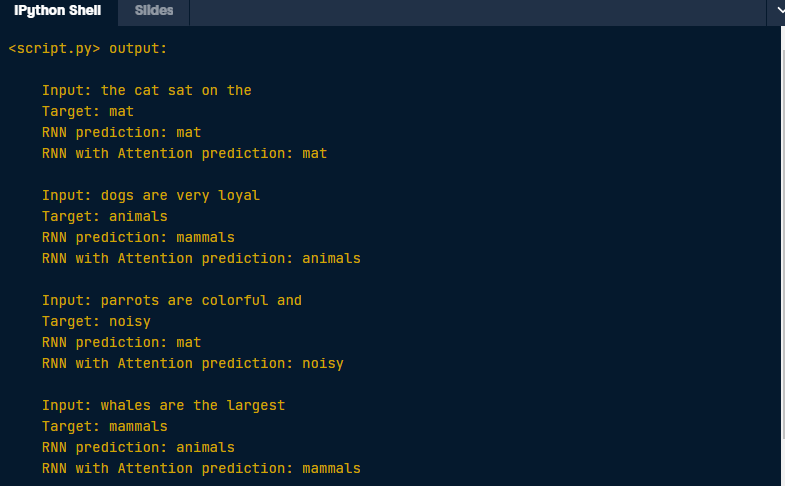